In [2]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Starbucks Capstone Challenge

## Project Overview

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Data was properly prepared in the `data_wrangling.ipynb` file, as long as descriptions for the columns involved.

## Problem statement

The goal for this project is to predict how likely will a customer respond to an offer, based on demographics and behavioural data. 

The model uses...

## Packages used

The following packages are used:
<ol>
    <li> <strong>pandas</strong>: python package for data analysis
    <li> <strong>numpy</strong>: 
    <li> <strong>matplotlib</strong>: 
    <li> <strong>seaborn</strong>: 
    <li> <strong>scitkit-learn</strong>: 
    <li> <strong>scipy.stats</strong>: 
    <li> <strong></strong>: 
</ol>

## Metrics

The following metrics are going to be used to measure the models performance:

## Loading data

Data was cleaned in `data_modeling.ipynb`.

In [3]:
events = pd.read_csv('data\\transcript_clean.csv')
customers = pd.read_csv('data\profile_clean.csv')
portfolio = pd.read_csv('data\portfolio_clean.csv')

In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      306534 non-null  object 
 1   time             306534 non-null  int64  
 2   amount           138953 non-null  float64
 3   offer_id         167581 non-null  object 
 4   reward           33579 non-null   float64
 5   offer_completed  306534 non-null  int64  
 6   offer_received   306534 non-null  int64  
 7   offer_viewed     306534 non-null  int64  
 8   transaction      306534 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 21.0+ MB


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   customer_id                               14825 non-null  object
 1   became_member_on                          14825 non-null  object
 2   gender_F                                  14825 non-null  int64 
 3   gender_M                                  14825 non-null  int64 
 4   gender_O                                  14825 non-null  int64 
 5   age_range_age_0_to_18                     14825 non-null  int64 
 6   age_range_age_18_to_25                    14825 non-null  int64 
 7   age_range_age_25_to_30                    14825 non-null  int64 
 8   age_range_age_30_to_35                    14825 non-null  int64 
 9   age_range_age_35_to_40                    14825 non-null  int64 
 10  age_range_age_40_to_45                    1482

In [6]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   reward                    10 non-null     int64 
 1   difficulty                10 non-null     int64 
 2   duration                  10 non-null     int64 
 3   offer_id                  10 non-null     object
 4   channel_0_email           10 non-null     int64 
 5   channel_0_web             10 non-null     int64 
 6   channel_1_email           10 non-null     int64 
 7   channel_1_mobile          10 non-null     int64 
 8   channel_2_mobile          10 non-null     int64 
 9   channel_2_social          10 non-null     int64 
 10  channel_3_social          10 non-null     int64 
 11  offer_type_bogo           10 non-null     int64 
 12  offer_type_discount       10 non-null     int64 
 13  offer_type_informational  10 non-null     int64 
dtypes: int64(13), object(1)
memor

In [7]:
df_merge = pd.merge(customers, 
                    events,
                    how='outer',
                    on='customer_id')
df_merge.head()

,customer_id,became_member_on,gender_F,gender_M,gender_O,age_range_age_0_to_18,age_range_age_18_to_25,age_range_age_25_to_30,age_range_age_30_to_35,age_range_age_35_to_40,...,income_range_income_70000.0_to_90000.0,income_range_income_90000.0_to_110000.0,time,amount,offer_id,reward,offer_completed,offer_received,offer_viewed,transaction
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18,21.51,NaN,NaN,0,0,0,1
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,144,32.28,NaN,NaN,0,0,0,1
2,0610b486422d4921ae7d2bf64640c50b,2017-07-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,408,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0
3,0610b486422d4921ae7d2bf64640c50b,2017-07-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,504,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0,1,0,0
4,0610b486422d4921ae7d2bf64640c50b,2017-07-15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,528,23.22,NaN,NaN,0,0,0,1


In [8]:
df = pd.merge(df_merge,
            portfolio,
            how='outer',
            on='offer_id')
df['offer_id'].unique().shape

(11,)

That means 10 types of offer plus the portfolio.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 43 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   customer_id                               306534 non-null  object 
 1   became_member_on                          272762 non-null  object 
 2   gender_F                                  272762 non-null  float64
 3   gender_M                                  272762 non-null  float64
 4   gender_O                                  272762 non-null  float64
 5   age_range_age_0_to_18                     272762 non-null  float64
 6   age_range_age_18_to_25                    272762 non-null  float64
 7   age_range_age_25_to_30                    272762 non-null  float64
 8   age_range_age_30_to_35                    272762 non-null  float64
 9   age_range_age_35_to_40                    272762 non-null  float64
 10  age_range_age_40_to_

## Who are the buying customers?
At this section, I'm going to analyse the data to better understand customers who buy stuff behavior and demographics.

In [10]:
# plotting functions to be used
def parse_data(df, columns):
    """[summary]

    Args:
        df ([DataFrame]): DataFrame to be parsed.
        columns ([type]): Columns to be analysed.

    Returns:
        overall_values ([list]): list containing data to be plotted
        buying_values ([list]): list of data to be plotted (buying only)
    """    
    overall = df.groupby('customer_id').first()
    buying = df[df['offer_completed']>0].groupby('customer_id').first()
    overall_values = []
    buying_values = []
    total = overall.shape[0]

    for col in columns:
        overall_values.append(overall[col].dropna().sum()/total*100)
        buying_values.append(buying[col].dropna().sum()/total*100)

    return overall_values, buying_values
    
def plot_bars(overall_values, buying_values, column_names, legend, title, spacing=0.1, print_diffs=True):
    """Helper function for the stacked bars

    Args:
        overall_values ([list of lists]): Each list member containing a bar.
        buying_values ([list of lists]): Like the one above.
        column_names ([list of strings]): Column names.
        legend ([list of strings]): Legends
    """    

    fig, ax = plt.subplots(figsize=(15,10))
    a_hundred = 100*np.ones(len(overall_values)) #to plot the background
    ax.barh(column_names, a_hundred, color = '#B0B0B0')
    ax.barh(column_names, overall_values, color = 'slategrey')
    ax.barh(column_names, buying_values, color = 'steelblue')
    ax.invert_yaxis()
    ax.set_xticks(range(0,101,5))
    ax.legend(legend)
    ax.set_title(title)

    # annotations for data values
    for i, v in enumerate(overall_values):
        ax.annotate('Overall '+str(column_names[i])+'='+str(round(v,1)),
                    xy=(v-1,i),
                    va='center',
                    fontsize=12,
                    color='black')
    for i, v in enumerate(buying_values):
        ax.annotate('Buying '+str(column_names[i])+'='+str(round(v,1)),
                    xy=(v-0.7,i+spacing),
                    va='center',
                    fontsize=12,
                    color='black')

    # remove axes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(
        axis='both',       # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        labelbottom=False) # labels along the bottom edge are off

    # adjusts aesthetics
    plt.rc('ytick', labelsize=12)
    plt.rc('legend', fontsize=12)
    
    if print_diffs:
        print('Differences:\n')
        diffs = dict(zip(column_names,np.subtract(overall_values,buying_values)))
        print(diffs)

    fig.tight_layout()


Differences:

{'Female': 4.341176470588238, 'Male': 12.16470588235294, 'Others': 0.1941176470588235}


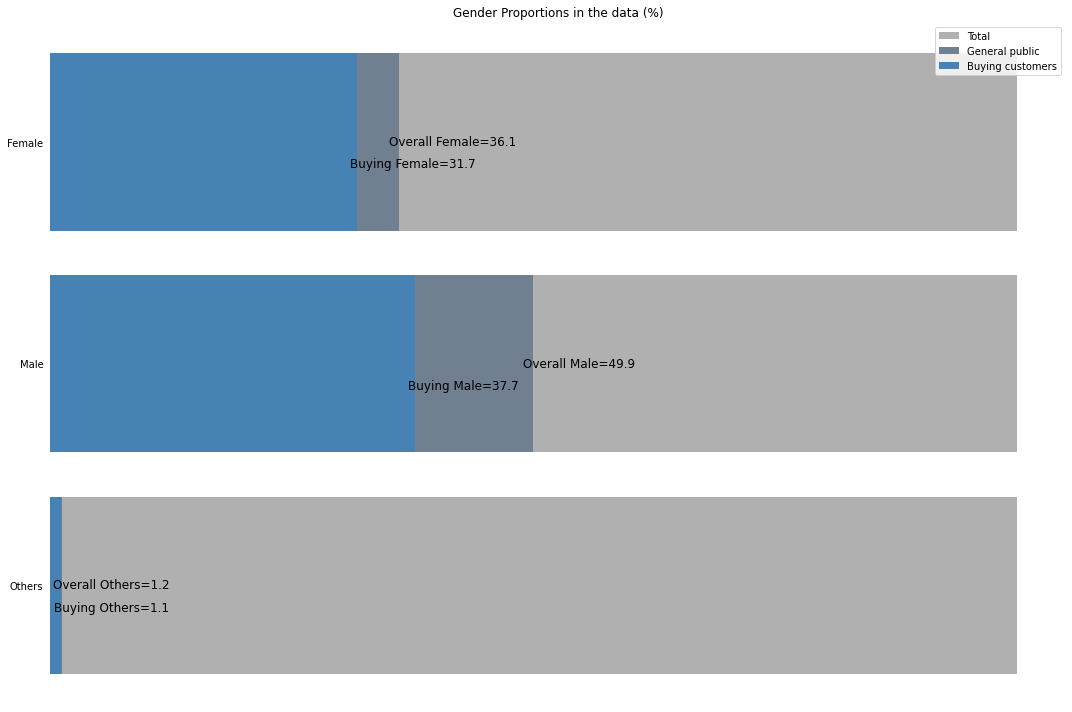

In [11]:
columns = ['gender_F', 'gender_M', 'gender_O']
gender_proportions, gender_proportions_buying = parse_data(df, columns)
column_names = ['Female', 'Male', 'Others']
legend = ['Total','General public', 'Buying customers']
title = 'Gender Proportions in the data (%)'

plot_bars(gender_proportions,
          gender_proportions_buying, 
          column_names, 
          legend,
          title)


Even the male customers being the most present in the dataset, we can clearly see that women are more likely to be the ones buying. 

Differences:

{'age_range_age_0_to_18': 0.12352941176470594, 'age_range_age_18_to_25': 1.6941176470588233, 'age_range_age_25_to_30': 1.117647058823529, 'age_range_age_30_to_35': 1.0352941176470587, 'age_range_age_35_to_40': 1.1470588235294121, 'age_range_age_40_to_45': 1.394117647058824, 'age_range_age_45_to_50': 1.5294117647058831, 'age_range_age_50_to_55': 1.6529411764705877, 'age_range_age_55_to_60': 1.6647058823529406, 'age_range_age_60_to_65': 1.4352941176470608, 'age_range_age_65_to_101': 3.9058823529411804}


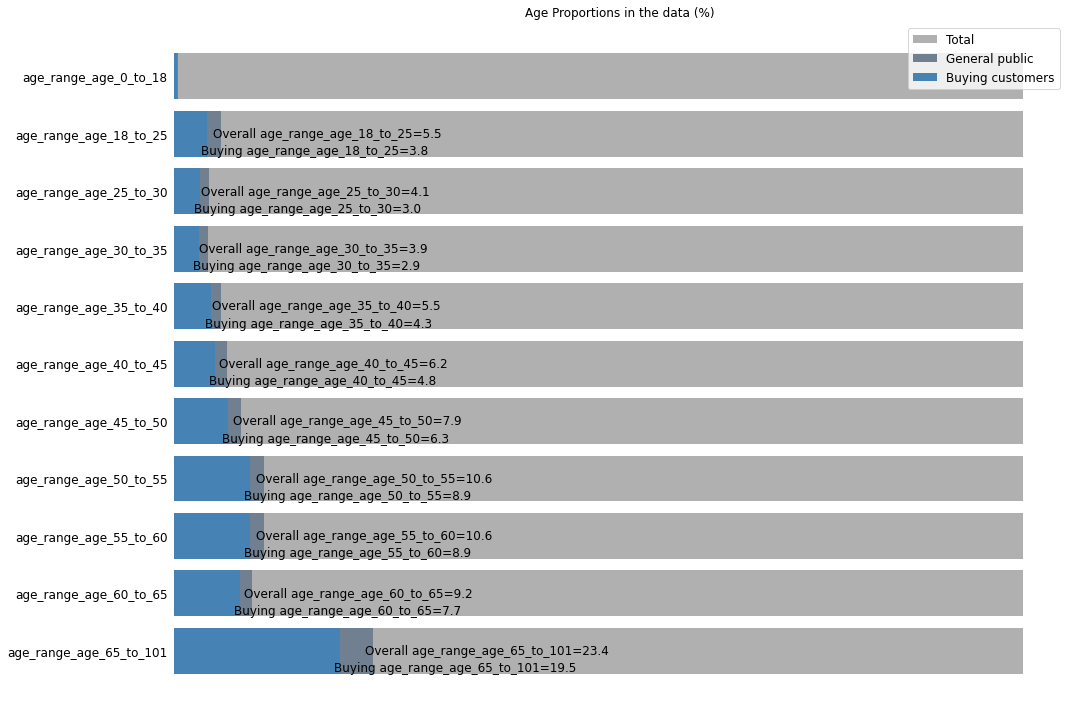

In [12]:
columns = ['age_range_age_0_to_18', 
           'age_range_age_18_to_25', 
           'age_range_age_25_to_30',
           'age_range_age_30_to_35', 
           'age_range_age_35_to_40', 
           'age_range_age_40_to_45',
           'age_range_age_45_to_50', 
           'age_range_age_50_to_55', 
           'age_range_age_55_to_60',
           'age_range_age_60_to_65', 
           'age_range_age_65_to_101']
age_proportions, age_proportions_buying = parse_data(df, columns)
legend = ['Total','General public', 'Buying customers']
title = 'Age Proportions in the data (%)'
age_proportions
plot_bars(age_proportions,
          age_proportions_buying, 
          columns, 
          legend,
          title,
          spacing=0.3)


Age doesn't seem to have a huge impact in conversion.

Differences:

{'income_range_income_10000.0_to_30000.0': 0.1882352941176471, 'income_range_income_30000.0_to_50000.0': 7.288235294117646, 'income_range_income_50000.0_to_70000.0': 6.158823529411766, 'income_range_income_70000.0_to_90000.0': 2.2411764705882327, 'income_range_income_90000.0_to_110000.0': 0.7117647058823522, 'income_range_income_110000.0_to_120000.0': 0.11176470588235254}


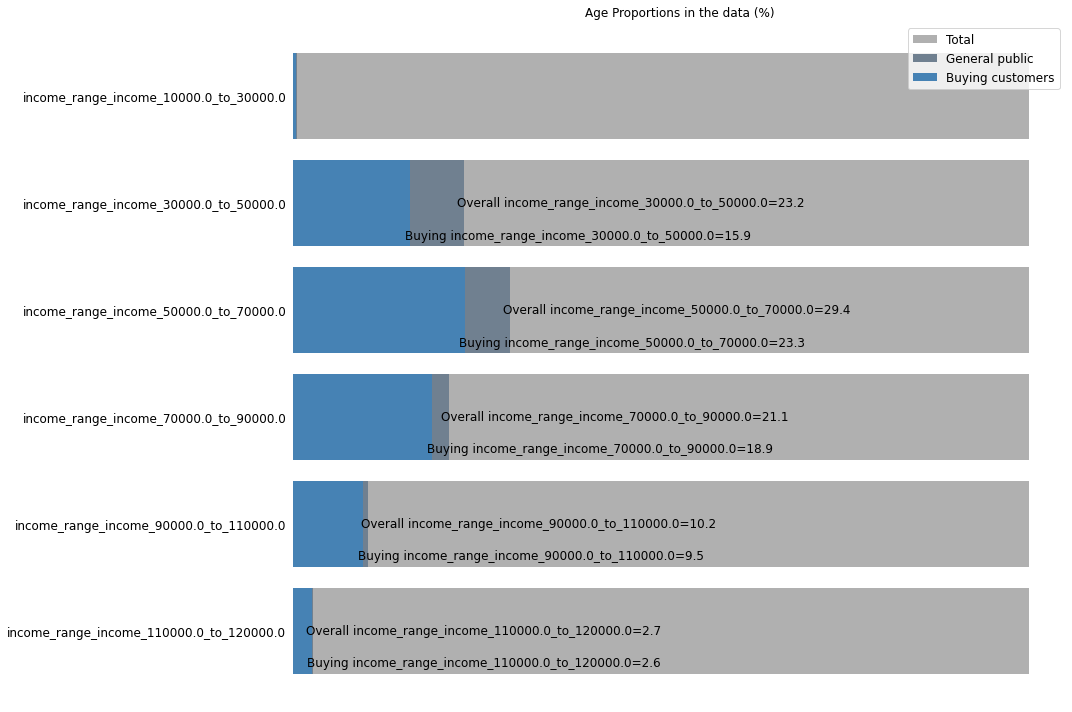

In [16]:
columns = ['income_range_income_10000.0_to_30000.0', 
           'income_range_income_30000.0_to_50000.0', 
           'income_range_income_50000.0_to_70000.0',
           'income_range_income_70000.0_to_90000.0', 
           'income_range_income_90000.0_to_110000.0', 
           'income_range_income_110000.0_to_120000.0']
income_proportions, income_proportions_buying = parse_data(df, columns)
legend = ['Total','General public', 'Buying customers']
title = 'Age Proportions in the data (%)'
income_proportions
plot_bars(income_proportions,
          income_proportions_buying, 
          columns, 
          legend,
          title,
          spacing=0.3)

This seemed a little intuitive, but lower income ranges tend to have worse conversions.

# erase later
Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).